## Preprocessing

In [36]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import pandas as pd
import tensorflow as tf
import keras
import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, classification_report

# Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


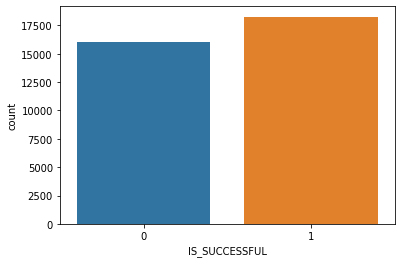

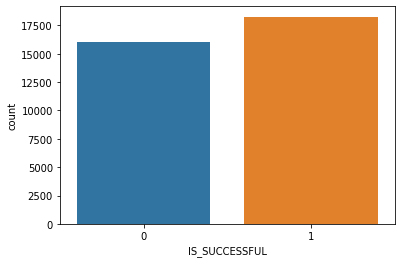

In [37]:
# Plot Y value to see if oversampling is needed
sns.countplot(application_df['IS_SUCCESSFUL'])
plt.show()

In [38]:
application_df['NAME'].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [39]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
drop = ['EIN', 'NAME']

application_df.drop(drop, axis = 1, inplace = True)

In [40]:
# Determine the number of unique values in each columns
print(application_df.apply(lambda col: len(col.unique())).sort_values(ascending = False))

ASK_AMT                   8747
CLASSIFICATION              71
APPLICATION_TYPE            17
INCOME_AMT                   9
AFFILIATION                  6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
SPECIAL_CONSIDERATIONS       2
IS_SUCCESSFUL                2
dtype: int64
ASK_AMT                   8747
CLASSIFICATION              71
APPLICATION_TYPE            17
INCOME_AMT                   9
AFFILIATION                  6
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
SPECIAL_CONSIDERATIONS       2
IS_SUCCESSFUL                2
dtype: int64


In [41]:
# Look at APPLICATION_TYPE value counts for binning
types = application_df.APPLICATION_TYPE.value_counts().to_frame()
types['Percentage'] = types['APPLICATION_TYPE']/types['APPLICATION_TYPE'].sum()
types['CUMSUM'] = types['Percentage'].cumsum()
types

,APPLICATION_TYPE,Percentage,CUMSUM
T3,27037,0.788274,0.788274
T4,1542,0.044958,0.833231
T6,1216,0.035453,0.868684
T5,1173,0.034199,0.902883
T19,1065,0.031050,0.933934
T8,737,0.021488,0.955421
T7,725,0.021138,0.976559
T10,528,0.015394,0.991953
T9,156,0.004548,0.996501
T13,66,0.001924,0.998426


,APPLICATION_TYPE,Percentage,CUMSUM
T3,27037,0.788274,0.788274
T4,1542,0.044958,0.833231
T6,1216,0.035453,0.868684
T5,1173,0.034199,0.902883
T19,1065,0.031050,0.933934
T8,737,0.021488,0.955421
T7,725,0.021138,0.976559
T10,528,0.015394,0.991953
T9,156,0.004548,0.996501
T13,66,0.001924,0.998426


In [42]:
rare = types.index[-8:]
print(rare)

Index(['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17'], dtype='object')
Index(['T13', 'T12', 'T2', 'T25', 'T14', 'T29', 'T15', 'T17'], dtype='object')


In [43]:
# Choose a cutoff value and create a list of application types to be replaced
# use the variable name `application_types_to_replace`

# Replace in dataframe for rare 
for app in rare:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Rare")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3      27037
T4       1542
T6       1216
T5       1173
T19      1065
T8        737
T7        725
T10       528
T9        156
Rare      120
Name: APPLICATION_TYPE, dtype: int64

T3      27037
T4       1542
T6       1216
T5       1173
T19      1065
T8        737
T7        725
T10       528
T9        156
Rare      120
Name: APPLICATION_TYPE, dtype: int64

In [44]:
# Look at CLASSIFICATION value counts for binning
classification = application_df.CLASSIFICATION.value_counts().sort_values(ascending = False).to_frame()
classification.head(15)

,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


,CLASSIFICATION
C1000,17326
C2000,6074
C1200,4837
C3000,1918
C2100,1883
C7000,777
C1700,287
C4000,194
C5000,116
C1270,114


## Z-Score Calculation from Outlier

In [45]:
from scipy import stats
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

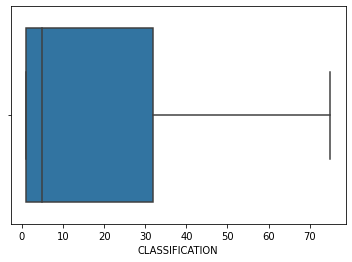

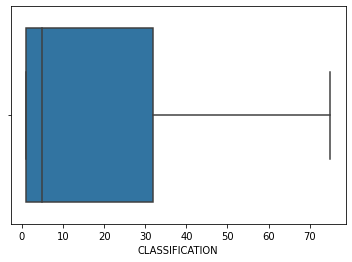

In [46]:
sns.boxplot(data = classification, x = 'CLASSIFICATION', showfliers=False)
plt.show()

In [47]:
classification['zscore'] = np.abs(stats.zscore(classification['CLASSIFICATION']))
outlier = classification[classification['zscore'] >= 2.5]
outlier

,CLASSIFICATION,zscore
C1000,17326,7.565220
C2000,6074,2.511234


,CLASSIFICATION,zscore
C1000,17326,7.565220
C2000,6074,2.511234


In [48]:
classification['CLASSIFICATION'].describe()

count       71.000000
mean       483.084507
std       2242.207852
min          1.000000
25%          1.000000
50%          5.000000
75%         32.000000
max      17326.000000
Name: CLASSIFICATION, dtype: float64

count       71.000000
mean       483.084507
std       2242.207852
min          1.000000
25%          1.000000
50%          5.000000
75%         32.000000
max      17326.000000
Name: CLASSIFICATION, dtype: float64

Based on the box-plot, what we see is that most classifications occur around 5. 

In [49]:
# You may find it helpful to look at CLASSIFICATION value counts >1
rarity = classification[classification['CLASSIFICATION'] < 5]
rare = rarity.index.tolist()
print(rare)

['C1260', 'C0', 'C2710', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C1728', 'C1570', 'C1283', 'C2380', 'C1732', 'C8210', 'C2170', 'C4120', 'C1245', 'C2561', 'C4500', 'C2500', 'C1236', 'C1580', 'C2570', 'C3700', 'C1900', 'C1820', 'C6100', 'C1248', 'C1370', 'C5200', 'C2600', 'C4200', 'C2190', 'C2150']
['C1260', 'C0', 'C2710', 'C3200', 'C1234', 'C1246', 'C1267', 'C1256', 'C1728', 'C1570', 'C1283', 'C2380', 'C1732', 'C8210', 'C2170', 'C4120', 'C1245', 'C2561', 'C4500', 'C2500', 'C1236', 'C1580', 'C2570', 'C3700', 'C1900', 'C1820', 'C6100', 'C1248', 'C1370', 'C5200', 'C2600', 'C4200', 'C2190', 'C2150']


In [50]:
# Choose a cutoff value and create a list of classifications to be replaced
# Replace in dataframe
for cls in rare:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"rare_class")
    
# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000         17326
C2000          6074
C1200          4837
C3000          1918
C2100          1883
C7000           777
C1700           287
C4000           194
C5000           116
C1270           114
C2700           104
C2800            95
C7100            75
C1300            58
C1280            50
rare_class       45
C1230            36
C1400            34
C2300            32
C7200            32
C1240            30
C8000            20
C7120            18
C1500            16
C6000            15
C1800            15
C1250            14
C8200            11
C1278            10
C1238            10
C1235             9
C1237             9
C7210             7
C4100             6
C1720             6
C2400             6
C1257             5
C1600             5
Name: CLASSIFICATION, dtype: int64

C1000         17326
C2000          6074
C1200          4837
C3000          1918
C2100          1883
C7000           777
C1700           287
C4000           194
C5000           116
C1270           114
C2700           104
C2800            95
C7100            75
C1300            58
C1280            50
rare_class       45
C1230            36
C1400            34
C2300            32
C7200            32
C1240            30
C8000            20
C7120            18
C1500            16
C6000            15
C1800            15
C1250            14
C8200            11
C1278            10
C1238            10
C1235             9
C1237             9
C7210             7
C4100             6
C1720             6
C2400             6
C1257             5
C1600             5
Name: CLASSIFICATION, dtype: int64

In [51]:
# Isolating Object Catories 
category = application_df.select_dtypes(include='object').columns
print(category)

Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype='object')
Index(['APPLICATION_TYPE', 'AFFILIATION', 'CLASSIFICATION', 'USE_CASE',
       'ORGANIZATION', 'INCOME_AMT', 'SPECIAL_CONSIDERATIONS'],
      dtype='object')


In [52]:
# Convert categorical data to numeric with `pd.get_dummies`
cat = pd.get_dummies(application_df[category], drop_first=False)

In [53]:
# Drop original data
application_df.drop(category, axis = 1, inplace = True)
application_df = pd.merge(application_df, cat, left_index = True, right_index = True)

In [54]:
# Split our preprocessed data into our features and target arrays
feature = [col for col in application_df.columns if col != 'IS_SUCCESSFUL']
X = application_df[feature]
Y = application_df['IS_SUCCESSFUL']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [55]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## PCA for Visualization 

In [56]:
from sklearn.decomposition import PCA

pca = PCA(n_components= 3)
pca.fit(X_train)
pca_df = pca.fit_transform(X_train_scaled)
pca_df = pd.DataFrame(pca_df, columns = ['PCA_1', 'PCA_2', 'PCA_3'])

In [57]:
pca_df.tail()

,PCA_1,PCA_2,PCA_3
27434,-0.552250,-2.121872,-0.143612
27435,5.148671,2.217351,0.040616
27436,0.885817,-2.473187,0.014752
27437,0.885817,-2.473187,0.014752
27438,4.065499,-0.817387,0.063073


,PCA_1,PCA_2,PCA_3
27434,-0.552250,-2.121872,-0.143612
27435,5.148671,2.217351,0.040616
27436,0.885817,-2.473187,0.014752
27437,0.885817,-2.473187,0.014752
27438,4.065499,-0.817387,0.063073


In [58]:
print(pca.explained_variance_ratio_, )

[0.06227936 0.03680274 0.02678391]
[0.06227936 0.03680274 0.02678391]


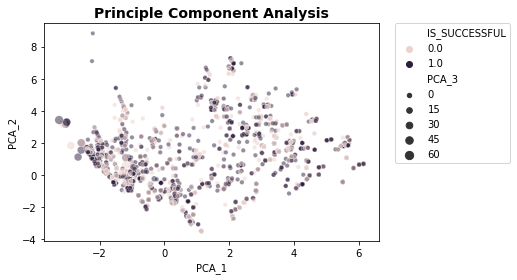

<Figure size 1080x1296 with 0 Axes>

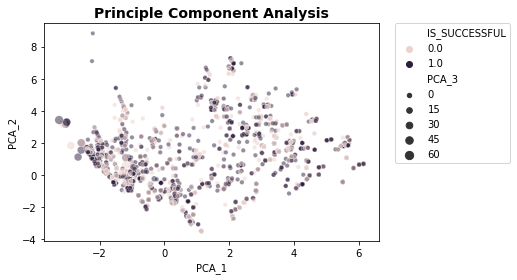

<Figure size 1080x1296 with 0 Axes>

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.scatterplot(data = pca_df, x = 'PCA_1', y = 'PCA_2', hue = y_train, 
                size = 'PCA_3', alpha = 0.5)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Principle Component Analysis', fontsize = 14, fontweight = 'bold')
plt.figure(figsize=(15,18))
plt.show()


## Compile, Train and Evaluate the Model

In [60]:
# from keras.layers import LeakyReLU
# # Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

# nn_model = tf.keras.models.Sequential()

# nn_model.add(tf.keras.layers.Dense(units=31, activation = LeakyReLU(alpha= 1), input_dim = len(X_train.columns)))

# # First hidden layer
# nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

# # Second hidden layer
# nn_model.add(tf.keras.layers.Dense(units=128, activation="relu"))

# # Output layer
# nn_model.add(tf.keras.layers.Dense(units= 1, activation="sigmoid"))

# # Check the structure of the model
# nn_model.summary()

In [61]:
# # Compile the model
# nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [62]:
# # # Save Call-back every 5 epoches 
# from keras.callbacks import Callback

# checkpoint_filepath = 'Weights/Model/weights{epoch:08d}.h5'

# mc = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath,
#     save_weights_only=True,
#     monitor='val_accuracy',
#     mode='max',
#     save_freq = 5)

In [63]:
# # Train the model
# nn_model.fit(X_train_scaled, y_train, epochs= 100, callbacks = [mc])

In [64]:
nn_model = keras.models.load_model('Models/AlphabetSoupCharity.h5')

In [65]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

215/215 - 0s - loss: 0.5675 - accuracy: 0.7286 - 268ms/epoch - 1ms/step
215/215 - 0s - loss: 0.5675 - accuracy: 0.7286 - 268ms/epoch - 1ms/step
Loss: 0.567529559135437, Accuracy: 0.7285714149475098
Loss: 0.567529559135437, Accuracy: 0.7285714149475098


In [66]:
# Y_prediction
y_pred = nn_model.predict(X_test_scaled).ravel()

215/215 [==============================] - 0s 709us/step


In [67]:
# Converting Probablilities to classification 
y_pred = pd.Series(y_pred).apply(lambda x: 1 if x >= 0.5 else 0)

In [68]:
# Generate a confusion matrix for the model
cm = confusion_matrix(y_test, y_pred)

# Calculating the accuracy score
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,1996,1211
Actual 1,651,3002


,Predicted 0,Predicted 1
Actual 0,1996,1211
Actual 1,651,3002


In [69]:
# Print the classification report for the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      3207
           1       0.71      0.82      0.76      3653

    accuracy                           0.73      6860
   macro avg       0.73      0.72      0.72      6860
weighted avg       0.73      0.73      0.73      6860

              precision    recall  f1-score   support

           0       0.75      0.62      0.68      3207
           1       0.71      0.82      0.76      3653

    accuracy                           0.73      6860
   macro avg       0.73      0.72      0.72      6860
weighted avg       0.73      0.73      0.73      6860



In [70]:
# Export our model to HDF5 file
# nn_model.save('Models/AlphabetSoupCharity.h5')